# **Phân cụm dữ liệu - Kmeans**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cbook
import seaborn as sns;sns.set()
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.patheffects as PathEffects

In [2]:
df = pd.read_csv('new_data.csv')
df.head()


,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH


## **1. Phân cụm khối thi**

- Tạo list lưu 12 khối phổ biến nhất
- Từ điểm 3 môn cao nhất + độ phổ biến dự đoán khối thi của thí sinh => Đưa vào 1 cột mới 'khoi_thi'
- Nếu điểm 3 môn cao nhất không thuộc 12 khối phổ biến thì phải chọn 3 môn có tổng cao thứ 2


In [4]:
df_dt1 = df.loc[(df['phan_loai'] == 'THPT_KHXH') | (df['phan_loai'] == 'THPT_KHTN')]
df_dt2 = df.loc[(df['phan_loai'] == 'GDTX_KHXH') | (df['phan_loai'] == 'GDTX_KHTN')]
df_dt3 = df.loc[(df['phan_loai'] == 'DH_RETEST')]
df_dt4 = df.loc[(df['phan_loai'] == 'TH_RETEST')]

In [5]:
def sumhighest3subjects(row):
    col = ['A00', 'A01', 'A02', 'A07', 'B00', 'B03', 'B08', 'C00', 'C01', 'C02', 'D01', 'D07']
    temp = [row['toan'] + row['vat_li'] + row['hoa_hoc'],
    row['toan'] + row['vat_li'] + row['ngoai_ngu'],
    row['toan'] + row['vat_li'] + row['sinh_hoc'],
    row['toan'] + row['lich_su'] + row['dia_ly'],
    row['toan'] + row['sinh_hoc'] + row['hoa_hoc'],
    row['toan'] + row['sinh_hoc'] + row['ngu_van'],
    row['toan'] + row['sinh_hoc'] + row['ngoai_ngu'],
    row['ngu_van'] + row['lich_su'] + row['dia_ly'],
    row['ngu_van'] + row['toan'] + row['vat_li'],
    row['ngu_van'] + row['toan'] + row['hoa_hoc'],
    row['ngu_van'] + row['toan'] + row['ngoai_ngu'],
    row['hoa_hoc'] + row['toan'] + row['ngoai_ngu']]
    temp1 = []
    col1 =[]

    for i in range(12):
        if (~np.isnan(temp[i])):
            temp1.append(temp[i])
            col1.append(col[i])
    
    if (temp1):
        max_index = np.argmax(temp1)
        row['tong_diem_3_mon'] = temp1[max_index]
        row['khoi_thi'] = col1[max_index]
    else:
        row['tong_diem_3_mon'] = np.nan
        row['khoi_thi'] = np.nan
    return row

In [6]:
df_dt1 = df_dt1.apply(sumhighest3subjects, axis = 1)

In [7]:
df_dt1.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH,25.00,C00


In [8]:
df_dt2 = df_dt2.apply(sumhighest3subjects, axis = 1)

In [9]:
df_dt2.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
11,1,1000012,6.4,7.50,NaN,NaN,NaN,NaN,4.75,5.00,8.00,GDTX_KHXH,17.25,C00
18,1,1000019,6.8,7.50,NaN,NaN,NaN,NaN,7.25,6.25,8.00,GDTX_KHXH,21.00,C00
20,1,1000021,8.0,9.00,NaN,NaN,NaN,NaN,7.00,6.25,8.75,GDTX_KHXH,22.25,C00
49,1,1000050,7.4,7.25,NaN,NaN,NaN,NaN,4.75,6.00,7.25,GDTX_KHXH,18.15,A07
73,1,1000074,7.6,6.50,NaN,7.5,2.5,1.75,NaN,NaN,NaN,GDTX_KHTN,21.60,C01


In [10]:
df_dt3 = df_dt3.apply(sumhighest3subjects, axis = 1)

In [11]:
df_dt3.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
8,1,1000009,2.6,5.25,NaN,NaN,NaN,NaN,5.25,6.75,NaN,DH_RETEST,17.25,C00
13,1,1000014,5.8,5.50,6.4,NaN,NaN,NaN,8.50,8.00,NaN,DH_RETEST,22.30,A07
19,1,1000020,NaN,6.75,NaN,NaN,NaN,NaN,8.50,8.00,NaN,DH_RETEST,23.25,C00
43,1,1000044,2.6,3.00,NaN,NaN,NaN,NaN,2.00,4.50,NaN,DH_RETEST,9.50,C00
59,1,1000060,8.2,7.50,7.2,NaN,NaN,NaN,NaN,NaN,NaN,DH_RETEST,22.90,D01


In [12]:
df = pd.concat([df_dt1,df_dt2,df_dt3,df_dt4])



In [13]:
df.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH,25.00,C00


In [14]:
df.to_csv('new_data1.csv',index=False)

## **2. Khối thi**

- Tìm chỉ số k phù hợp cho Kmeans
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- Chia ra các cụm (cluster)
- df.head() => Nhận xét điểm riêng từng cụm
- Đặt tên cho từng cụm

In [3]:
df = pd.read_csv('new_data1.csv')
df.head()

,cum,sbd,toan,ngu_van,ngoai_ngu,vat_li,hoa_hoc,sinh_hoc,lich_su,dia_ly,gdcd,phan_loai,tong_diem_3_mon,khoi_thi
0,1,1000001,3.6,5.00,4.0,NaN,NaN,NaN,2.75,6.0,8.75,THPT_KHXH,13.75,C00
1,1,1000002,8.4,6.75,7.6,NaN,NaN,NaN,8.50,7.5,8.25,THPT_KHXH,24.40,A07
2,1,1000003,5.8,7.50,5.0,NaN,NaN,NaN,7.25,5.5,8.75,THPT_KHXH,20.25,C00
3,1,1000004,7.4,7.50,8.6,NaN,NaN,NaN,7.50,6.5,7.50,THPT_KHXH,23.50,D01
4,1,1000005,7.2,8.50,9.0,NaN,NaN,NaN,8.00,8.5,8.25,THPT_KHXH,25.00,C00


##### Hàm chỉ số k

In [4]:
K = range(1, 10)
def plt_kmeas(X):
    distortions = []
    mapping1 = {}
    
    for k in K:
        # Building and fitting the model
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
    
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                            'euclidean'), axis=1)) / X.shape[0])
       
    
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                    'euclidean'), axis=1)) / X.shape[0]
        
    return distortions,mapping1

##### Hàm biểu đồ kmeans

In [49]:
def kmeans_display(X, label, centers):
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    X3 = X[label == 3, :]
    plt.figure(figsize = (5,5))
    plt.scatter(X0[:, 0], X0[:, 1], X0[:, 2])
    plt.scatter(X1[:, 0], X1[:, 1], X1[:, 2])
    plt.scatter(X2[:, 0], X2[:, 1], X2[:, 2])
    plt.scatter(X3[:, 0], X3[:, 1], X3[:, 2])
    [plt.text(centers[i][0], centers[i][1] , str(int(centers[i][0] + centers[i][1] + centers[i][2])), fontsize=10, color='black') for i in range(len(centers))]
    plt.axis('equal')
    plt.plot()
    plt.show()

##### A00

In [6]:
df_A00 = df.loc[(df['khoi_thi'] == 'A00'),['toan', 'vat_li', 'hoa_hoc']]
A00 = np.array(list(zip(np.array(df_A00['toan']),np.array(df_A00['vat_li']),np.array(df_A00['hoa_hoc'])))).reshape(len(df_A00),3)

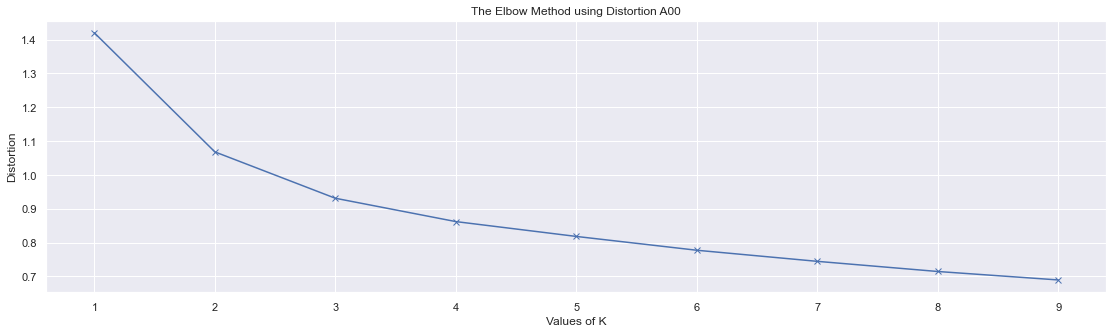

In [27]:
distortions,mapping = plt_kmeas(A00)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion A00')
plt.show()

- Từ biểu đồ của A00 giá trị ở "elbow" sẽ là 2, và từ 2 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 2

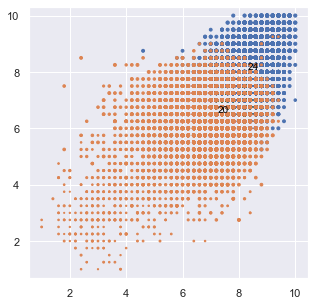

In [24]:
kmeans = KMeans(n_clusters=2).fit(A00)
pred_label = kmeans.predict(A00)
kmeans_display(A00, pred_label, kmeans.cluster_centers_)

Biểu đồ chia làm 2 cụm:
- Cụm trung bình 20 điểm đại học
- Cụm trung bình 24 điểm đại học

##### A01

In [9]:
df_A01 = df.loc[(df['khoi_thi'] == 'A01'),['toan', 'vat_li', 'ngoai_ngu']]
A01 = np.array(list(zip(np.array(df_A01['toan']),np.array(df_A01['vat_li']),np.array(df_A01['ngoai_ngu'])))).reshape(len(df_A01),3)

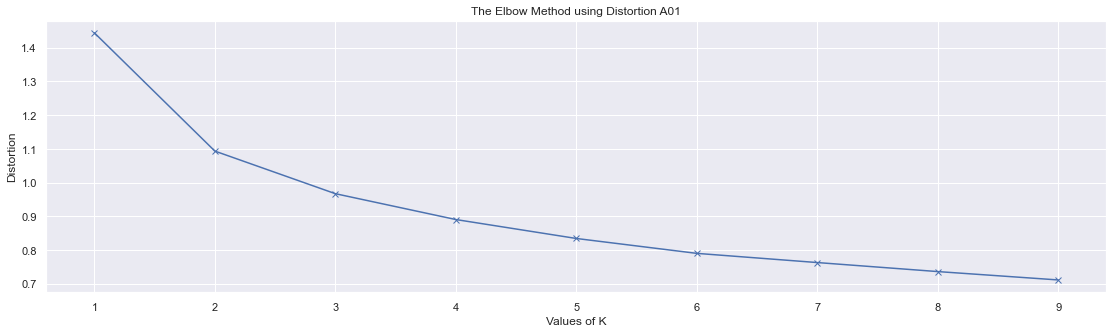

In [28]:
distortions,mapping = plt_kmeas(A01)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion A01')
plt.show()

- Từ biểu đồ của A01 giá trị ở "elbow" sẽ là 2, và từ 2 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 2

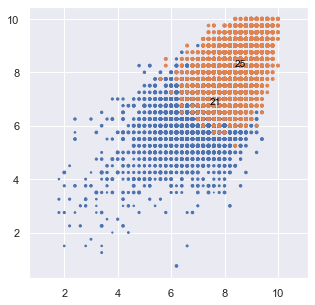

In [53]:
kmeans = KMeans(n_clusters=2).fit(A01)
pred_label = kmeans.predict(A01)
kmeans_display(A01, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 2 cụm:
- Cụm trung bình 21 điểm đại học
- Cụm trung bình 25 điểm đại học

##### A02

In [11]:
df_A02 = df.loc[(df['khoi_thi'] == 'A02'),['toan', 'vat_li', 'sinh_hoc']]
A02 = np.array(list(zip(np.array(df_A02['toan']),np.array(df_A02['vat_li']),np.array(df_A02['sinh_hoc'])))).reshape(len(df_A02),3)

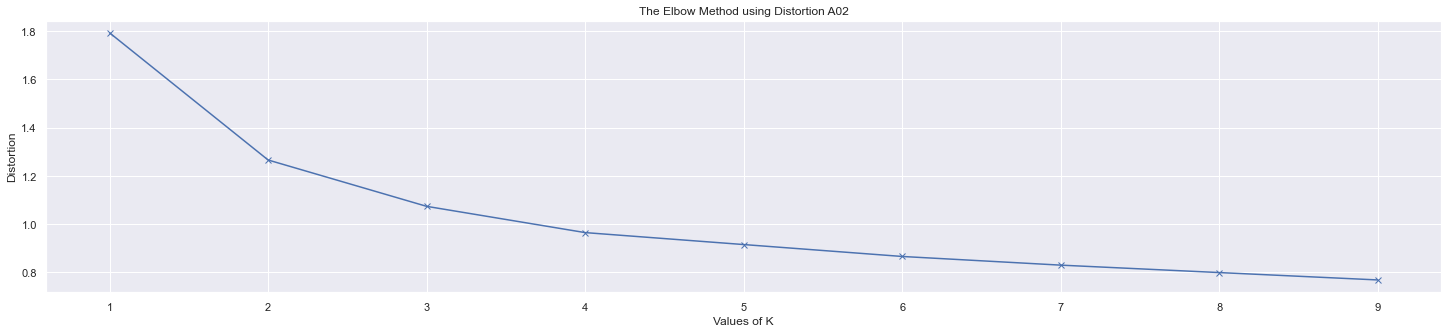

In [12]:
distortions,mapping = plt_kmeas(A02)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion A02')
plt.show()

- Từ biểu đồ của A02 giá trị ở "elbow" sẽ là 2, và từ 2 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 2

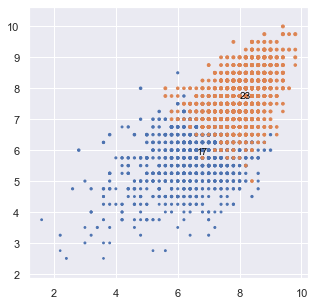

In [54]:
kmeans = KMeans(n_clusters=2).fit(A02)
pred_label = kmeans.predict(A02)
kmeans_display(A02, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 2 cụm:
- Cụm trung bình 17 điểm đại học
- Cụm trung bình 23 điểm đại học

##### A07

In [14]:
df_A07 = df.loc[(df['khoi_thi'] == 'A07'),['toan', 'lich_su', 'dia_ly']]
A07 = np.array(list(zip(np.array(df_A07['toan']),np.array(df_A07['lich_su']),np.array(df_A07['dia_ly'])))).reshape(len(df_A07),3)

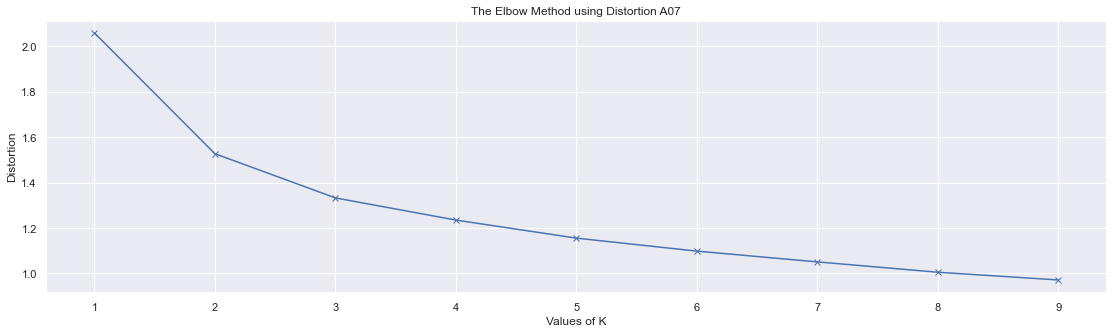

In [25]:
distortions,mapping = plt_kmeas(A07)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion A07')
plt.show()

- Từ biểu đồ của A07 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

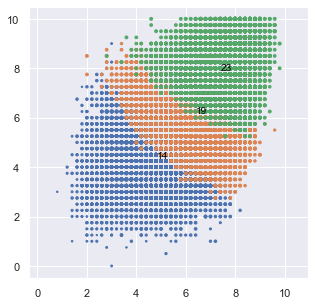

In [55]:
kmeans = KMeans(n_clusters=3).fit(A07)
pred_label = kmeans.predict(A07)
kmeans_display(A07, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 14 điểm đại học
- Cụm trung bình 19 điểm đại học
- Cụm trung bình 23 điểm đại học

##### B00

In [30]:
df_B00 = df.loc[(df['khoi_thi'] == 'B00'),['toan', 'hoa_hoc', 'sinh_hoc']]
B00 = np.array(list(zip(np.array(df_B00['toan']),np.array(df_B00['hoa_hoc']),np.array(df_B00['sinh_hoc'])))).reshape(len(df_B00),3)

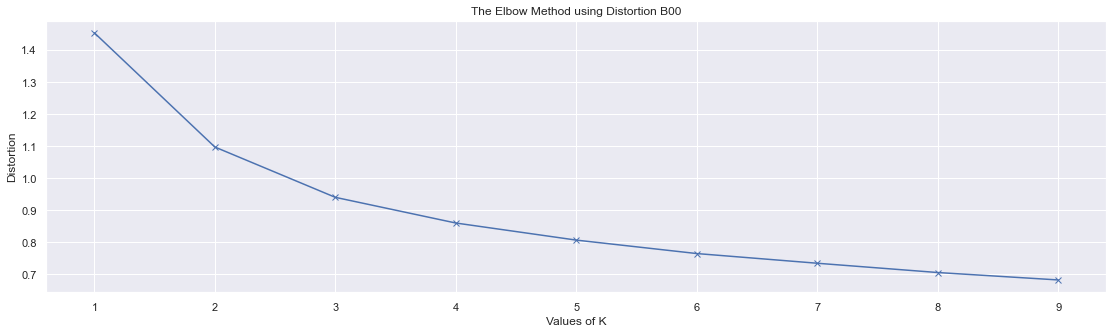

In [31]:
distortions,mapping = plt_kmeas(B00)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion B00')
plt.show()

Từ biểu đồ của B00 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

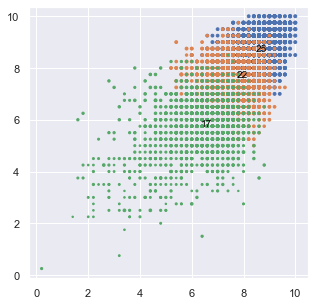

In [56]:
kmeans = KMeans(n_clusters=3).fit(B00)
pred_label = kmeans.predict(B00)
kmeans_display(B00, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 17 điểm đại học
- Cụm trung bình 22 điểm đại học
- Cụm trung bình 25 điểm đại học

##### B03

In [32]:
df_B03 = df.loc[(df['khoi_thi'] == 'B03'),['toan', 'ngu_van', 'sinh_hoc']]
B03 = np.array(list(zip(np.array(df_B03['toan']),np.array(df_B03['ngu_van']),np.array(df_B03['sinh_hoc'])))).reshape(len(df_B03),3)

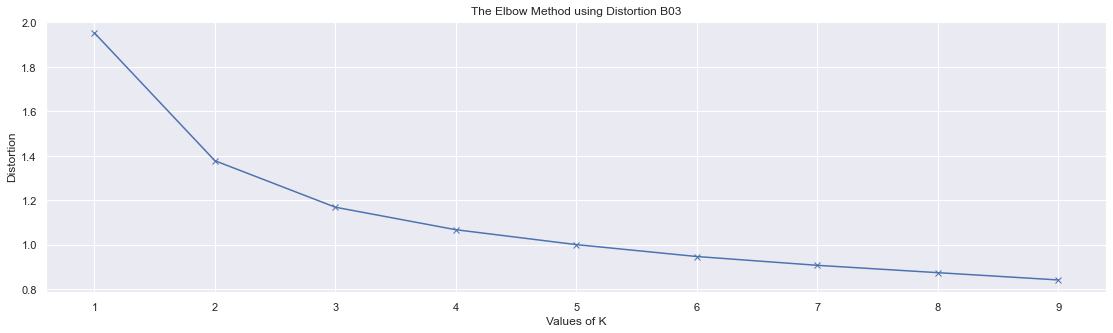

In [33]:
distortions,mapping = plt_kmeas(B03)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion B03')
plt.show()

Từ biểu đồ của B03 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

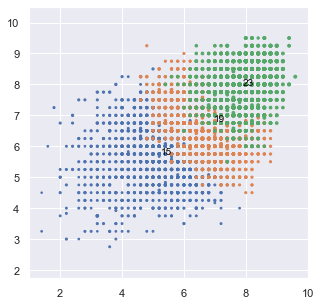

In [58]:
kmeans = KMeans(n_clusters=3).fit(B03)
pred_label = kmeans.predict(B03)
kmeans_display(B03, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 15 điểm đại học
- Cụm trung bình 19 điểm đại học
- Cụm trung bình 23 điểm đại học

##### B08

In [34]:
df_B08 = df.loc[(df['khoi_thi'] == 'B08'),['toan', 'ngoai_ngu', 'sinh_hoc']]
B08 = np.array(list(zip(np.array(df_B08['toan']),np.array(df_B08['ngoai_ngu']),np.array(df_B08['sinh_hoc'])))).reshape(len(df_B08),3)

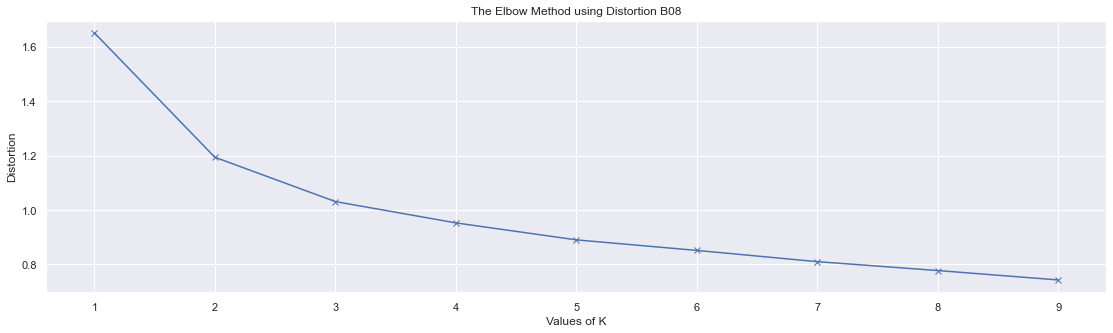

In [35]:
distortions,mapping = plt_kmeas(B08)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion B08')
plt.show()

Từ biểu đồ của B08 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

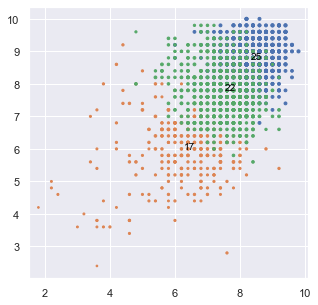

In [59]:
kmeans = KMeans(n_clusters=3).fit(B08)
pred_label = kmeans.predict(B08)
kmeans_display(B08, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 17 điểm đại học
- Cụm trung bình 22 điểm đại học
- Cụm trung bình 25 điểm đại học

##### C00

In [36]:
df_C00 = df.loc[(df['khoi_thi'] == 'C00'),['ngu_van', 'lich_su', 'dia_ly']]
C00 = np.array(list(zip(np.array(df_C00['ngu_van']),np.array(df_C00['lich_su']),np.array(df_C00['dia_ly'])))).reshape(len(df_C00),3)

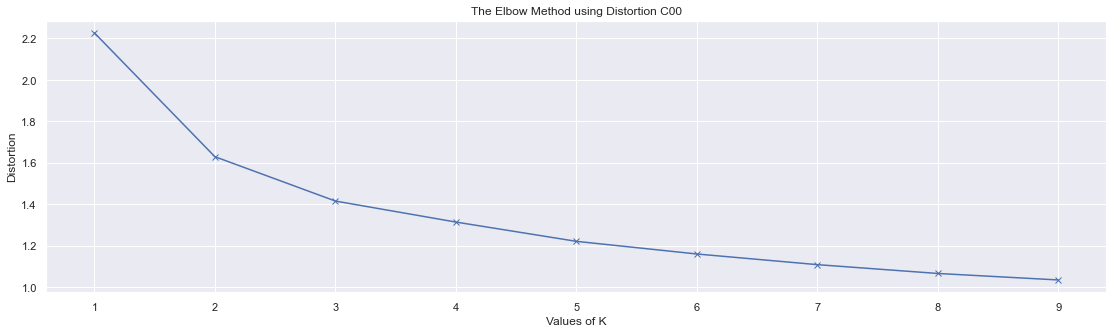

In [37]:
distortions,mapping = plt_kmeas(C00)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion C00')
plt.show()

Từ biểu đồ của C00 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

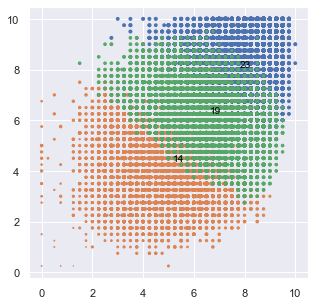

In [60]:
kmeans = KMeans(n_clusters=3).fit(C00)
pred_label = kmeans.predict(C00)
kmeans_display(C00, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 14 điểm đại học
- Cụm trung bình 19 điểm đại học
- Cụm trung bình 23 điểm đại học

##### C01

In [38]:
df_C01 = df.loc[(df['khoi_thi'] == 'C01'),['ngu_van', 'toan', 'vat_li']]
C01 = np.array(list(zip(np.array(df_C01['ngu_van']),np.array(df_C01['toan']),np.array(df_C01['vat_li'])))).reshape(len(df_C01),3)

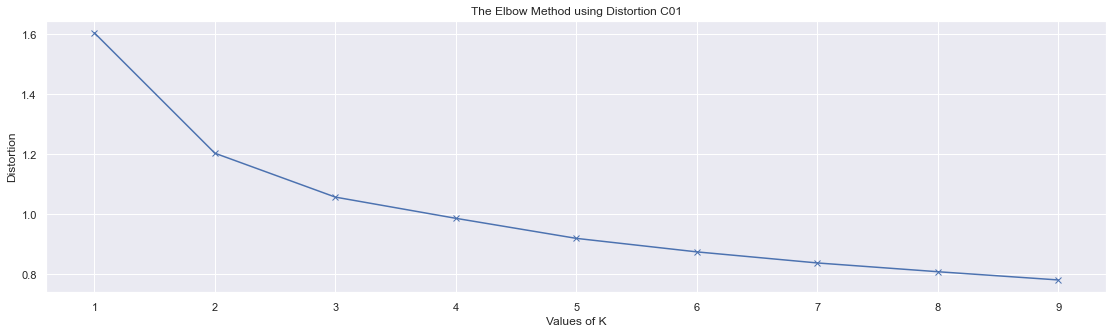

In [39]:
distortions,mapping = plt_kmeas(C01)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion C01')
plt.show()

Từ biểu đồ của C01 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

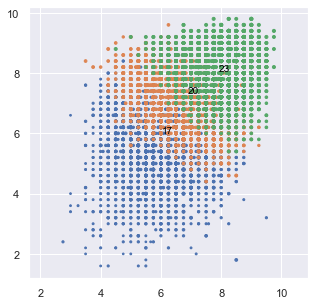

In [48]:
kmeans = KMeans(n_clusters=3).fit(C01)
pred_label = kmeans.predict(C01)
kmeans_display(C01, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 17 điểm đại học
- Cụm trung bình 20 điểm đại học
- Cụm trung bình 23 điểm đại học

##### C02

In [40]:
df_C02 = df.loc[(df['khoi_thi'] == 'C02'),['ngu_van', 'toan', 'hoa_hoc']]
C02 = np.array(list(zip(np.array(df_C02['ngu_van']),np.array(df_C02['toan']),np.array(df_C02['hoa_hoc'])))).reshape(len(df_C02),3)

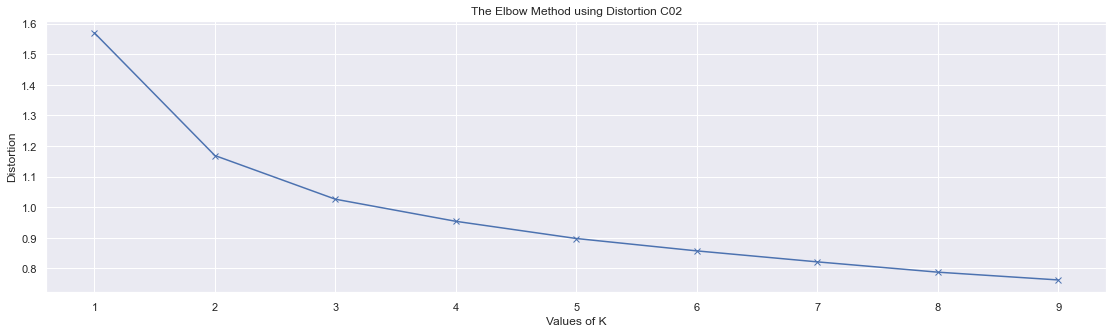

In [41]:
distortions,mapping = plt_kmeas(C02)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion C02')
plt.show()

Từ biểu đồ của C02 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

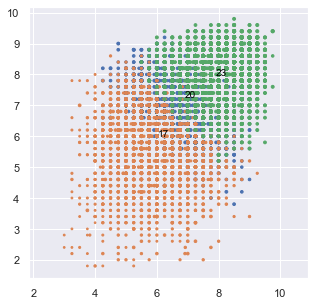

In [61]:
kmeans = KMeans(n_clusters=3).fit(C02)
pred_label = kmeans.predict(C02)
kmeans_display(C02, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 17 điểm đại học
- Cụm trung bình 20 điểm đại học
- Cụm trung bình 23 điểm đại học

##### D01

In [42]:
df_D01 = df.loc[(df['khoi_thi'] == 'D01'),['ngu_van', 'toan', 'ngoai_ngu']]
D01 = np.array(list(zip(np.array(df_D01['ngu_van']),np.array(df_D01['toan']),np.array(df_D01['ngoai_ngu'])))).reshape(len(df_D01),3)

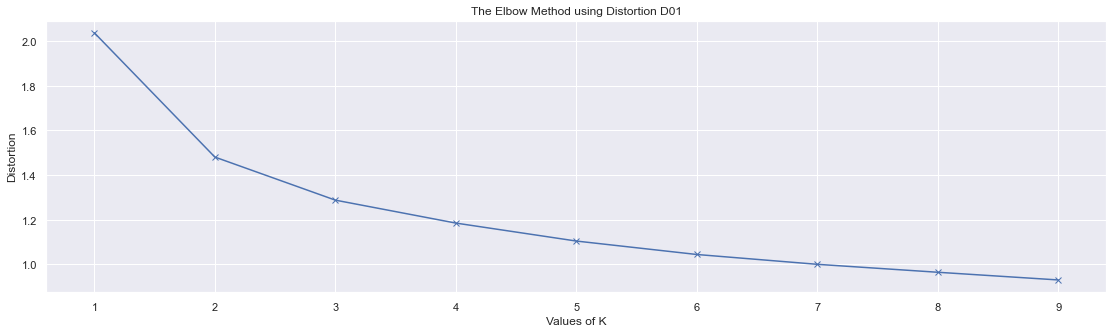

In [43]:
distortions,mapping = plt_kmeas(D01)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion D01')
plt.show()

Từ biểu đồ của D01 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

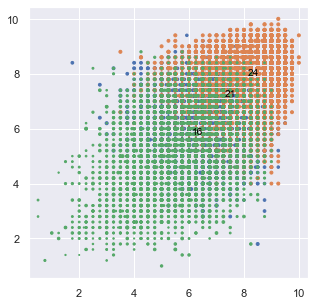

In [64]:
kmeans = KMeans(n_clusters=3).fit(D01)
pred_label = kmeans.predict(D01)
kmeans_display(D01, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 16 điểm đại học
- Cụm trung bình 21 điểm đại học
- Cụm trung bình 24 điểm đại học

##### D07

In [44]:
df_D07 = df.loc[(df['khoi_thi'] == 'D07'),['hoa_hoc', 'toan', 'ngoai_ngu']]
D07 = np.array(list(zip(np.array(df_D07['hoa_hoc']),np.array(df_D07['toan']),np.array(df_D07['ngoai_ngu'])))).reshape(len(df_D07),3)

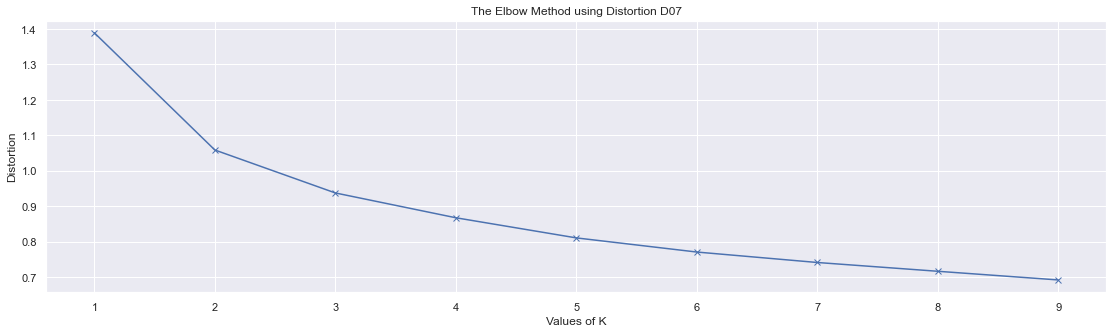

In [45]:
distortions,mapping = plt_kmeas(D07)
plt.figure(figsize = (19,5))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion D07')
plt.show()

Từ biểu đồ của D07 giá trị ở "elbow" sẽ là 3, và từ 3 trở đi, khoảng giữa mỗi cluster không quá khác biệt nên ta chọn k = 3

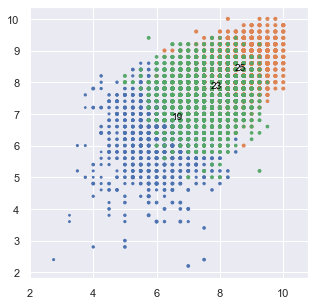

In [63]:
kmeans = KMeans(n_clusters=3).fit(D07)
pred_label = kmeans.predict(D07)
kmeans_display(D07, pred_label,kmeans.cluster_centers_)

Biểu đồ chia làm 3 cụm:
- Cụm trung bình 19 điểm đại học
- Cụm trung bình 23 điểm đại học
- Cụm trung bình 25 điểm đại học